In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("data/names.txt", 'r') as f:
  words = f.read().splitlines()

In [4]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s,i in s_to_i.items()}

In [85]:
block_size = 3
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = s_to_i[ch]
    X.append(context)
    Y.append(ix)
    #print("".join(i_to_s[i] for i in context), "->", i_to_s[ix])
    #context[0] = context[1]
    #context[1] = context[2]
    #context[2] = ix
    context = context[1:] + [ix]
    
X = torch.tensor(X)
Y = torch.tensor(Y)

In [113]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = s_to_i[ch]
      X.append(context)
      Y.append(ix)
      #print("".join(i_to_s[i] for i in context), "->", i_to_s[ix])
      #context[0] = context[1]
      #context[1] = context[2]
      #context[2] = ix
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])




torch.Size([182562, 3]) torch.Size([182562])
torch.Size([22807, 3]) torch.Size([22807])
torch.Size([22777, 3]) torch.Size([22777])


In [14]:
C = torch.randn((27, 2))

In [ ]:
# C[5]   C[[5, 6]]   C[torch.tensor([5, 6])]

In [30]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [31]:
X[0, 0]

tensor(0)

In [32]:
C[0]

tensor([0.9187, 0.7791])

In [33]:
C[X[0, 0]]

tensor([0.9187, 0.7791])

In [34]:
C[X][0, 0]

tensor([0.9187, 0.7791])

In [35]:
C[X]

tensor([[[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.9187,  0.7791]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.6389, -1.3597]],

        [[ 0.9187,  0.7791],
         [ 0.6389, -1.3597],
         [-0.6063, -0.4680]],

        [[ 0.6389, -1.3597],
         [-0.6063, -0.4680],
         [-0.6063, -0.4680]],

        [[-0.6063, -0.4680],
         [-0.6063, -0.4680],
         [ 0.2914, -1.7724]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.9187,  0.7791]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.6085,  0.4212]],

        [[ 0.9187,  0.7791],
         [ 0.6085,  0.4212],
         [-0.1190, -0.5710]],

        [[ 0.6085,  0.4212],
         [-0.1190, -0.5710],
         [ 0.0918,  0.9060]],

        [[-0.1190, -0.5710],
         [ 0.0918,  0.9060],
         [-0.4273,  0.8745]],

        [[ 0.0918,  0.9060],
         [-0.4273,  0.8745],
         [ 0.0918,  0.9060]],

        [[-0.4273,  0

In [36]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
#W1 = torch.randn((6, 100))
#b1 = torch.randn(100)
# emb @ W + b1 does not work yet

In [40]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [42]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [43]:
emb.view(32, 6)

tensor([[ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.6389, -1.3597],
        [ 0.9187,  0.7791,  0.6389, -1.3597, -0.6063, -0.4680],
        [ 0.6389, -1.3597, -0.6063, -0.4680, -0.6063, -0.4680],
        [-0.6063, -0.4680, -0.6063, -0.4680,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.6085,  0.4212],
        [ 0.9187,  0.7791,  0.6085,  0.4212, -0.1190, -0.5710],
        [ 0.6085,  0.4212, -0.1190, -0.5710,  0.0918,  0.9060],
        [-0.1190, -0.5710,  0.0918,  0.9060, -0.4273,  0.8745],
        [ 0.0918,  0.9060, -0.4273,  0.8745,  0.0918,  0.9060],
        [-0.4273,  0.8745,  0.0918,  0.9060,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.2914, -1.7724, -0.4273,  0.8745],
        [ 0.2914, -1.7724, -0.4273,  0.8

In [45]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [46]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [48]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
print(h.shape)
# emb.view(-1, 6) @ W + b1
# 32, 100
#  1, 100

torch.Size([32, 100])


In [55]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [57]:
logits = h @ W2 + b2

In [60]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [63]:
probs.shape, probs[0].sum()

(torch.Size([32, 27]), tensor(1.))

In [67]:
loss = -probs[torch.arange(32), Y].log().mean()

In [68]:
loss

tensor(16.8739)

In [ ]:
##

In [114]:
Xtr.shape, Ytr.shape

(torch.Size([182562, 3]), torch.Size([182562]))

In [122]:
#g = torch.Generator().manual_seed(420)
#C = torch.randn((27, 2), generator=g)
#W1 = torch.randn((6, 100), generator=g)
#b1 = torch.randn(100, generator=g)
#W2 = torch.randn((100, 27), generator=g)
#b2 = torch.randn(27, generator=g)
#parameters = [C, W1, b1, W2, b2]

In [142]:
g = torch.Generator().manual_seed(420)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [143]:
sum(p.nelement() for p in parameters)

17697

In [144]:
for p in parameters:
  p.requires_grad = True

In [106]:
# reasonable lr < 1, < 0.001
# torch.linspace(0.001, 1, 1000) # does not make sense to go through the sapce lineary
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
#lrs

In [145]:
lri = []
lossi = []
stepi = []
lr = 0.1

In [146]:
lr = 0.1
for i in range(100_000):
  
  # minibach
  ix = torch.randint(0, Xtr.shape[0], (100,))
  
  # forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # used to be -1, 6
  logits = h @ W2 + b2

  #counts = logits.exp()
  #probs = counts / counts.sum(1, keepdim=True)
  #loss = -probs[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  if i == 50_000:
    lr = 0.02
  if i == 90_000:
    lr = 0.01
  for p in parameters:
    p.data -= lr * p.grad
    
  #lri.append(lre[i])
  lossi.append(loss.log10().item())
  stepi.append(i)
print(loss.item())

1.9813215732574463


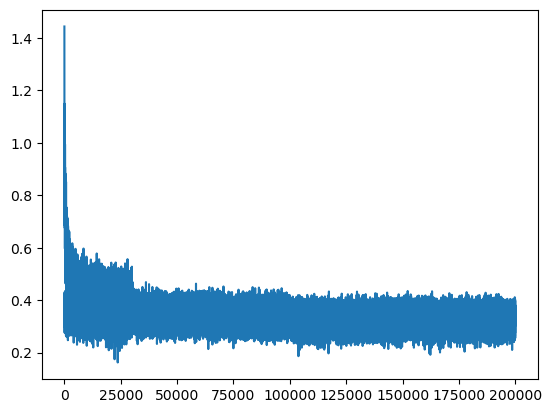

In [141]:
plt.plot(stepi, lossi)

In [ ]:
logits.max(1), Y

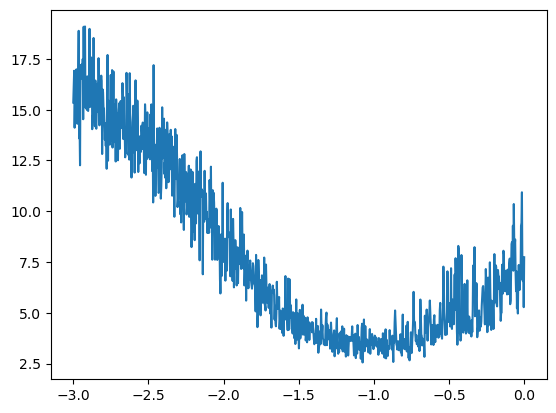

In [108]:
plt.plot(lri, lossi)

In [147]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1916, grad_fn=<NllLossBackward0>)

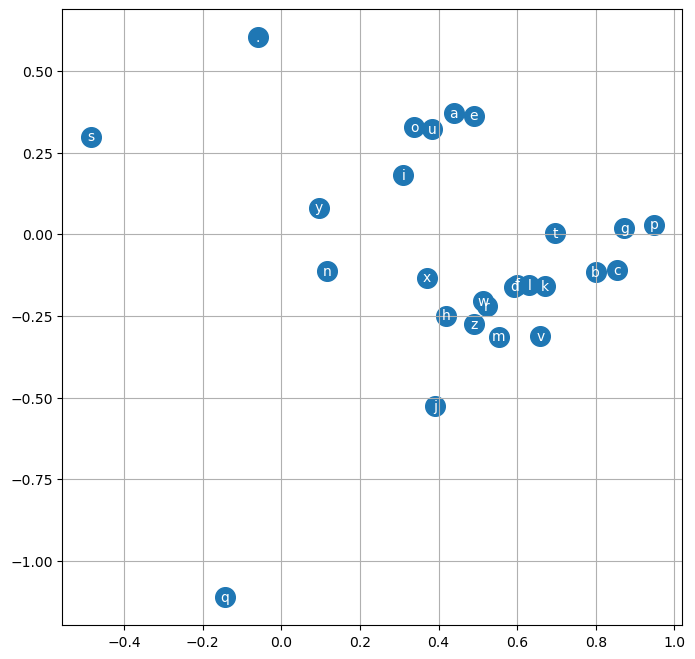

In [129]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), i_to_s[i], ha="center", va="center", color="white")
plt.grid('minor')

In [149]:
g = torch.Generator().manual_seed(420)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(i_to_s[i] for i in out))

heightyn.
belliyah.
zas.
lesta.
katen.
xon.
saibuen.
erson.
daya.
kolauer.
jonna.
jamina.
dax.
lulel.
chimane.
cam.
arjelyn.
micharena.
pawstairah.
mich.
